> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [219]:
#### Escreva sua resposta aqui
from dataclasses import dataclass, field
from enum import Enum
class BiteLevel(Enum):
    Beginner = 'Beginner'
    Intermediate ='Intermediate'
    Advanced = 'Advanced'
     
@dataclass(order=True)
class Bite:
    number: int
    title: str
    level: BiteLevel = field(default=BiteLevel.Beginner)

    def __post_init__(self):
        if isinstance(self.level, str):
            self.level = BiteLevel[self.level]

    def __str__(self):
        return f'{self.number} - {self.title} ({self.level.value})'
    
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

bites.sort()
for b in bites:
    print(b)


1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [220]:
from pydantic import BaseModel, Field, field_validator
from typing import Optional
from datetime import datetime

class Clima(BaseModel):
    date: datetime
    temperature: float
    isCelsius: bool = Field(default=True)
    airQualityIndex: Optional[int] = None
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None

    # Valida e converte a temperatura (se necessário)
    @field_validator("temperature", mode="before")
    def val_temperature(cls, value):
        if isinstance(value, str):  # Se for string, converte para float
            return float(value)
        return value

    # Valida o campo `isCelsius`
    @field_validator("isCelsius", mode="before")
    def val_celsius(cls, value):
        if isinstance(value, str):
            if value.lower() in ["true", "yes"]:
                return True
            elif value.lower() in ["false", "no", "not true"]:
                return False
        return bool(value)

    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        if not self.isCelsius: 
            self.temperature = (self.temperature - 32) * 5.0 / 9.0

data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]


dados = []
for previsoes in data_samples:
    dado = Clima(**previsoes)
    dados.append(dado)


temp_media = sum(prev.temperature for prev in dados) / len(dados)
print(f"Temperatura média em Celsius: {temp_media:.2f}°C")
 

Temperatura média em Celsius: 16.39°C


#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [221]:
import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 3}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.009894371032714844,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-11-18T00:00",
      "2024-11-18T01:00",
      "2024-11-18T02:00",
      "2024-11-18T03:00",
      "2024-11-18T04:00",
      "2024-11-18T05:00",
      "2024-11-18T06:00",
      "2024-11-18T07:00",
      "2024-11-18T08:00",
      "2024-11-18T09:00",
      "2024-11-18T10:00",
      "2024-11-18T11:00",
      "2024-11-18T12:00",
      "2024-11-18T13:00",
      "2024-11-18T14:00",
      "2024-11-18T15:00",
      "2024-11-18T16:00",
      "2024-11-18T17:00",
      "2024-11-18T18:00",
      "2024-11-18T19:00",
      "2024-11-18T20:00",
      "2024-11-18T21:00",
      "2024-11-18T22:00",
      "2024-11-18T23:00",
      "2024-11-19T00:00",
      "2024-11-19T01:00",
      "2024-11-19T02:0

In [222]:
from pydantic import BaseModel
from typing import List

class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]


class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

response = requests.get(url, params=params).json()
dados = OpenMeteo(**response)
print(dados)

latitude=-19.5 longitude=-43.375 generationtime_ms=0.011920928955078125 utc_offset_seconds=0 timezone='GMT' timezone_abbreviation='GMT' elevation=2.0 hourly_units=HourlyUnits(time='iso8601', temperature_2m='°C') hourly=Hourly(time=['2024-11-18T00:00', '2024-11-18T01:00', '2024-11-18T02:00', '2024-11-18T03:00', '2024-11-18T04:00', '2024-11-18T05:00', '2024-11-18T06:00', '2024-11-18T07:00', '2024-11-18T08:00', '2024-11-18T09:00', '2024-11-18T10:00', '2024-11-18T11:00', '2024-11-18T12:00', '2024-11-18T13:00', '2024-11-18T14:00', '2024-11-18T15:00', '2024-11-18T16:00', '2024-11-18T17:00', '2024-11-18T18:00', '2024-11-18T19:00', '2024-11-18T20:00', '2024-11-18T21:00', '2024-11-18T22:00', '2024-11-18T23:00', '2024-11-19T00:00', '2024-11-19T01:00', '2024-11-19T02:00', '2024-11-19T03:00', '2024-11-19T04:00', '2024-11-19T05:00', '2024-11-19T06:00', '2024-11-19T07:00', '2024-11-19T08:00', '2024-11-19T09:00', '2024-11-19T10:00', '2024-11-19T11:00', '2024-11-19T12:00', '2024-11-19T13:00', '2024-11

#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

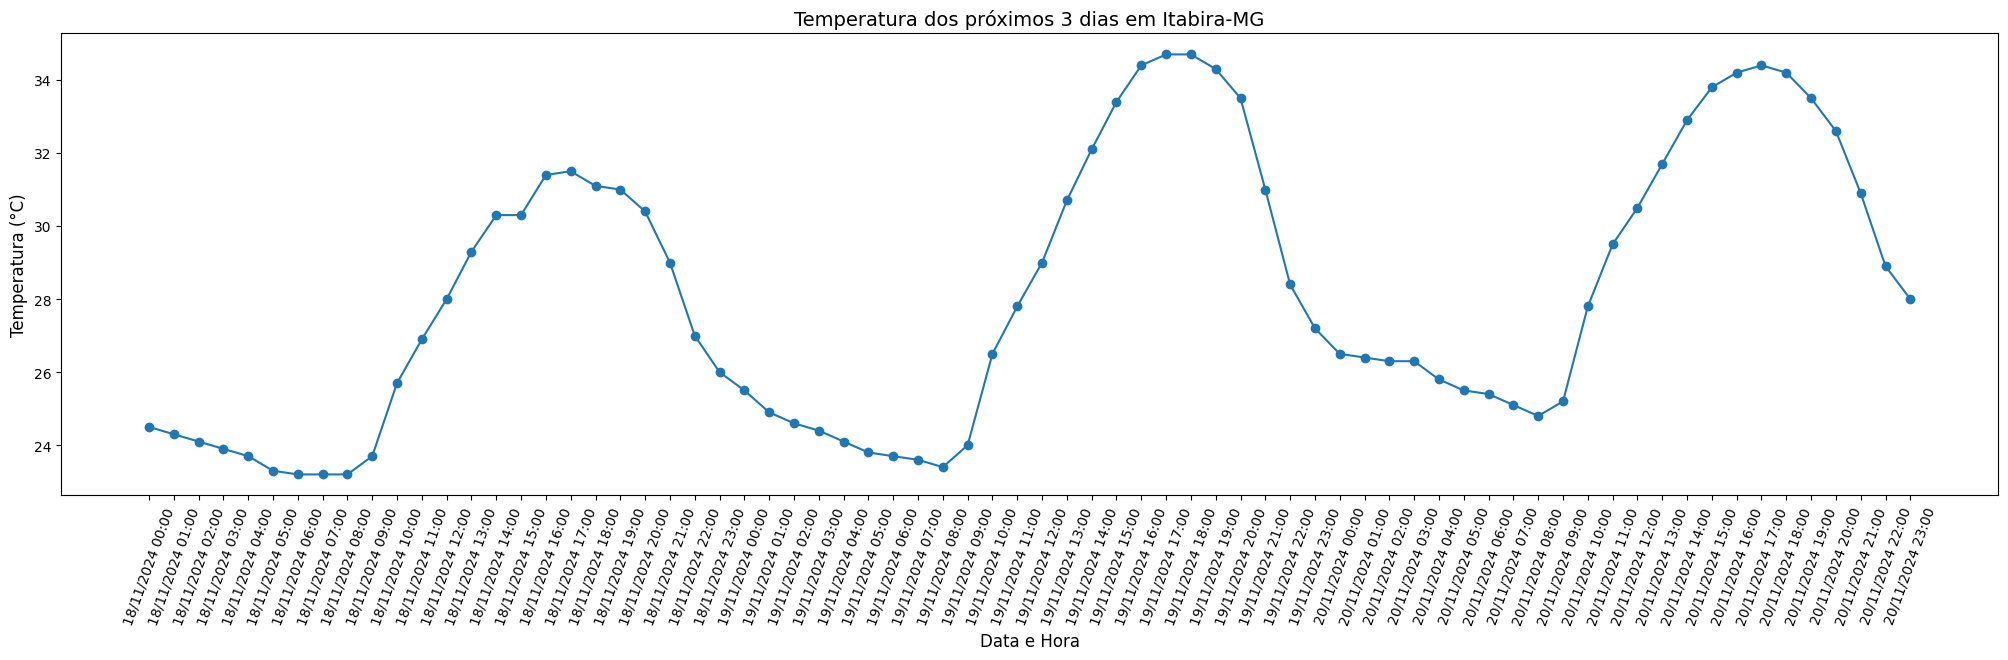

In [223]:
import pandas as pd
import matplotlib.pyplot as plt
prev=pd.DataFrame({"hora":dados.hourly.time, 'temperatura': dados.hourly.temperature_2m})
prev['hora'] = pd.to_datetime(prev['hora']).dt.strftime('%d/%m/%Y %H:%M')

x=prev['hora']
y=prev['temperatura']

plt.figure(figsize=(25, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Temperatura dos próximos 3 dias em Itabira-MG', fontsize=14)
plt.xlabel('Data e Hora', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.xticks(rotation=70)
plt.show()